In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1_train = pd.read_csv('smart_data.csv')

In [4]:
df1_train.head(61)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0   1451624400  0.932833  0.003483            0.932833         0.000033   
1   1451624401  0.934333  0.003467            0.934333         0.000000   
2   1451624402  0.931817  0.003467            0.931817         0.000017   
3   1451624403  1.022050  0.003483            1.022050         0.000017   
4   1451624404  1.139400  0.003467            1.139400         0.000133   
..         ...       ...       ...                 ...              ...   
56  1451624456  1.149317  0.003450            1.149317         0.000067   
57  1451624457  1.032817  0.003400            1.032817         0.000050   
58  1451624458  0.714200  0.003417            0.714200         0.000033   
59  1451624459  0.497067  0.003417            0.497067         0.000017   
60  1451624460  0.465133  0.003450            0.465133         0.000017   

    Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0         0.020700        0.061917          0.442633     0.124150   
1         0.020717        0.063817          0.444067     0.124000   
2         0.020700        0.062317          0.446067     0.123533   
3         0.106900        0.068517          0.446583     0.123133   
4         0.236933        0.063983          0.446533     0.122850   
..             ...             ...               ...          ...   
56        0.021883        0.657000          0.042783     0.022200   
57        0.021600        0.576017          0.042733     0.008750   
58        0.021083        0.309983          0.043067     0.005167   
59        0.096983        0.062867          0.043283     0.005000   
60        0.064500        0.062633          0.043250     0.005017   

    Wine cellar [kW]  ...  visibility        summary  apparentTemperature  \
0           0.006983  ...        10.0          Clear                29.26   
1           0.006983  ...        10.0          Clear                29.26   
2           0.006983  ...        10.0          Clear                29.26   
3           0.006983  ...        10.0          Clear                29.26   
4           0.006850  ...        10.0          Clear                29.26   
..               ...  ...         ...            ...                  ...   
56          0.123850  ...        10.0          Clear                29.26   
57          0.123350  ...        10.0          Clear                29.26   
58          0.123317  ...        10.0  Mostly Cloudy                29.40   
59          0.123283  ...        10.0  Mostly Cloudy                29.40   
60          0.123350  ...        10.0  Mostly Cloudy                29.40   

    pressure  windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0    1016.91       9.18  cloudCover        282.0              0.0      24.4   
1    1016.91       9.18  cloudCover        282.0              0.0      24.4   
2    1016.91       9.18  cloudCover        282.0              0.0      24.4   
3    1016.91       9.18  cloudCover        282.0              0.0      24.4   
4    1016.91       9.18  cloudCover        282.0              0.0      24.4   
..       ...        ...         ...          ...              ...       ...   
56   1016.91       9.18  cloudCover        282.0              0.0      24.4   
57   1016.91       9.18  cloudCover        282.0              0.0      24.4   
58   1016.25       8.29        0.75        285.0              0.0      23.9   
59   1016.25       8.29        0.75        285.0              0.0      23.9   
60   1016.25       8.29        0.75        285.0              0.0      23.9   

    precipProbability  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
..                ...  
56                0.0  
57                0.0  
58                0.0  
59                0.0  
60                0.0  

[61 rows x 32 columns]

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df1_train.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [7]:
for i in df1_train.columns:
  if '[kW]' in i:
    print(i)
    df1_train[i] = df1_train[i]*1000

df1_train.head()

use [kW]
gen [kW]
House overall [kW]
Dishwasher [kW]
Furnace 1 [kW]
Furnace 2 [kW]
Home office [kW]
Fridge [kW]
Wine cellar [kW]
Garage door [kW]
Kitchen 12 [kW]
Kitchen 14 [kW]
Kitchen 38 [kW]
Barn [kW]
Well [kW]
Microwave [kW]
Living room [kW]
Solar [kW]


time     use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400   932.833333  3.483333          932.833333         0.033300   
1  1451624401   934.333333  3.466667          934.333333         0.000000   
2  1451624402   931.816667  3.466667          931.816667         0.016700   
3  1451624403  1022.050000  3.483333         1022.050000         0.016700   
4  1451624404  1139.400000  3.466667         1139.400000         0.133333   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0       20.700000       61.916667        442.633333   124.150000   
1       20.716667       63.816667        444.066667   124.000000   
2       20.700000       62.316667        446.066667   123.533333   
3      106.900000       68.516667        446.583333   123.133333   
4      236.933333       63.983333        446.533333   122.850000   

   Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0          6.983333         13.083333         0.416667         0.150000   
1          6.983333         13.116667         0.416667         0.150000   
2          6.983333         13.083333         0.433333         0.166667   
3          6.983333         13.000000         0.433333         0.216667   
4          6.850000         12.783333         0.450000         0.333333   

   Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  Living room [kW]  \
0           0.0000  31.350000   1.016667        4.066667          1.516667   
1           0.0000  31.500000   1.016667        4.066667          1.650000   
2           0.0167  31.516667   1.000000        4.066667          1.650000   
3           0.0000  31.500000   1.016667        4.066667          1.616667   
4           0.0000  31.500000   1.016667        4.066667          1.583333   

   Solar [kW]  temperature         icon  humidity  visibility summary  \
0    3.483333        36.14  clear-night      0.62        10.0   Clear   
1    3.466667        36.14  clear-night      0.62        10.0   Clear   
2    3.466667        36.14  clear-night      0.62        10.0   Clear   
3    3.483333        36.14  clear-night      0.62        10.0   Clear   
4    3.466667        36.14  clear-night      0.62        10.0   Clear   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18  cloudCover        282.0   
1                29.26   1016.91       9.18  cloudCover        282.0   
2                29.26   1016.91       9.18  cloudCover        282.0   
3                29.26   1016.91       9.18  cloudCover        282.0   
4                29.26   1016.91       9.18  cloudCover        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0

In [8]:
df1_train.columns = [col.replace(' [kW]', '(W)') for col in df1_train.columns]
df1_train.columns

Index(['time', 'use(W)', 'gen(W)', 'House overall(W)', 'Dishwasher(W)',
       'Furnace 1(W)', 'Furnace 2(W)', 'Home office(W)', 'Fridge(W)',
       'Wine cellar(W)', 'Garage door(W)', 'Kitchen 12(W)', 'Kitchen 14(W)',
       'Kitchen 38(W)', 'Barn(W)', 'Well(W)', 'Microwave(W)', 'Living room(W)',
       'Solar(W)', 'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [9]:
df1_train.columns

Index(['time', 'use(W)', 'gen(W)', 'House overall(W)', 'Dishwasher(W)',
       'Furnace 1(W)', 'Furnace 2(W)', 'Home office(W)', 'Fridge(W)',
       'Wine cellar(W)', 'Garage door(W)', 'Kitchen 12(W)', 'Kitchen 14(W)',
       'Kitchen 38(W)', 'Barn(W)', 'Well(W)', 'Microwave(W)', 'Living room(W)',
       'Solar(W)', 'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

FEATURE ENGINERING

In [10]:
df1_train['Furnace'] = df1_train[['Furnace 1(W)','Furnace 2(W)']].sum(axis=1)
df1_train['Kitchen'] = df1_train[['Kitchen 12(W)','Kitchen 14(W)','Kitchen 38(W)']].mean(axis=1)

In [11]:
df1_train.drop(['Furnace 1(W)','Furnace 2(W)','Kitchen 12(W)','Kitchen 14(W)','Kitchen 38(W)'],axis=1,inplace=True)

In [12]:
df1_train.columns

Index(['time', 'use(W)', 'gen(W)', 'House overall(W)', 'Dishwasher(W)',
       'Home office(W)', 'Fridge(W)', 'Wine cellar(W)', 'Garage door(W)',
       'Barn(W)', 'Well(W)', 'Microwave(W)', 'Living room(W)', 'Solar(W)',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [13]:
df1_train.drop(['Wine cellar(W)','Garage door(W)','Barn(W)','Well(W)','House overall(W)'],axis=1,inplace=True)

In [14]:
df1_train.head()

time       use(W)    gen(W)  Dishwasher(W)  Home office(W)  \
0  1451624400   932.833333  3.483333       0.033300      442.633333   
1  1451624401   934.333333  3.466667       0.000000      444.066667   
2  1451624402   931.816667  3.466667       0.016700      446.066667   
3  1451624403  1022.050000  3.483333       0.016700      446.583333   
4  1451624404  1139.400000  3.466667       0.133333      446.533333   

    Fridge(W)  Microwave(W)  Living room(W)  Solar(W)  temperature  \
0  124.150000      4.066667        1.516667  3.483333        36.14   
1  124.000000      4.066667        1.650000  3.466667        36.14   
2  123.533333      4.066667        1.650000  3.466667        36.14   
3  123.133333      4.066667        1.616667  3.483333        36.14   
4  122.850000      4.066667        1.583333  3.466667        36.14   

          icon  humidity  visibility summary  apparentTemperature  pressure  \
0  clear-night      0.62        10.0   Clear                29.26   1016.91   
1  clear-night      0.62        10.0   Clear                29.26   1016.91   
2  clear-night      0.62        10.0   Clear                29.26   1016.91   
3  clear-night      0.62        10.0   Clear                29.26   1016.91   
4  clear-night      0.62        10.0   Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability     Furnace   Kitchen  
0                0.0   82.616667  0.188889  
1                0.0   84.533334  0.188889  
2                0.0   83.016667  0.205567  
3                0.0  175.416667  0.216667  
4                0.0  300.916666  0.261111

In [15]:
# Repositioning kitchen in columns index
df1_train.insert(6, 'Kitchen', df1_train.pop('Kitchen'))

In [16]:
df1_train.drop(['Furnace'],axis=1,inplace=True)

In [17]:
df1_train['use(W)'] = df1_train[['Dishwasher(W)', 'Home office(W)', 'Fridge(W)', 'Kitchen', 'Microwave(W)', 'Living room(W)']].sum(axis=1)

In [18]:
# Coverting to Time Series 

In [19]:
timestamp = pd.date_range(start='2003-01-01',end='2015-01-01',freq ='M')

In [20]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df1_train['time'].iloc[0]))))

 start  2016-01-01 10:30:00


In [21]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(df1_train),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df1_train = df1_train.set_index(time_index)
df1_train = df1_train.drop(['time'], axis=1)
df1_train.iloc[np.r_[0:5,-5:0]].iloc[:,0]

2016-01-01 05:00:00    572.588856
2016-01-01 05:01:00    573.972223
2016-01-01 05:02:00    575.538934
2016-01-01 05:03:00    575.633367
2016-01-01 05:04:00    575.427777
2016-12-16 03:26:00     51.966655
2016-12-16 03:27:00     51.999977
2016-12-16 03:28:00     52.416678
2016-12-16 03:29:00     52.000012
2016-12-16 03:30:00      0.000000
Name: use(W), dtype: float64

In [22]:
df1_train.drop(columns=['summary', 'icon','Dishwasher(W)', 'Home office(W)', 'Fridge(W)', 'Kitchen', 'Microwave(W)', 'Living room(W)','Solar(W)'],inplace=True)

In [23]:
df1_train[df1_train['cloudCover']=='cloudCover']['cloudCover'].count()
# We see there are 58 categorical values in the numerical column so must be replaced

58

In [24]:
# Replacing by the nearest neighbor value
df1_train['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df1_train['cloudCover'] = df1_train['cloudCover'].astype('float')
df1_train['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59,
        nan])

In [25]:
df1_train.shape

(503911, 13)

In [26]:
df1_train.dropna(inplace=True)

In [27]:
df1_train.shape

(503910, 13)

In [28]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use(W)               503910 non-null  float64
 1   gen(W)               503910 non-null  float64
 2   temperature          503910 non-null  float64
 3   humidity             503910 non-null  float64
 4   visibility           503910 non-null  float64
 5   apparentTemperature  503910 non-null  float64
 6   pressure             503910 non-null  float64
 7   windSpeed            503910 non-null  float64
 8   cloudCover           503910 non-null  float64
 9   windBearing          503910 non-null  float64
 10  precipIntensity      503910 non-null  float64
 11  dewPoint             503910 non-null  float64
 12  precipProbability    503910 non-null  float64
dtypes: float64(13)
memory usage: 53.8 MB


In [29]:
# Every minute values won't make much detailing to the data and will rather add to the dataframe size. So it's better to resample the data to Hourly basis.
df1_train = df1_train.resample('H').mean()

In [30]:
df1_train.shape

(8399, 13)

In [31]:
df1_train.head()

use(W)    gen(W)  temperature  humidity  visibility  \
2016-01-01 05:00:00  303.168810  3.306944    36.131000  0.619667        10.0   
2016-01-01 06:00:00  124.998436  3.421667    35.838667  0.610000        10.0   
2016-01-01 07:00:00  109.060475  3.448333    35.385000  0.613000        10.0   
2016-01-01 08:00:00  131.741303  3.447500    35.282000  0.640000        10.0   
2016-01-01 09:00:00   84.730847  3.439167    35.451667  0.641667        10.0   

                     apparentTemperature  pressure  windSpeed  cloudCover  \
2016-01-01 05:00:00            29.264667  1016.888   9.150333       0.750   
2016-01-01 06:00:00            29.364667  1016.232   8.284000       0.750   
2016-01-01 07:00:00            29.034000  1015.989   7.927000       0.750   
2016-01-01 08:00:00            30.395333  1016.042   5.684667       0.750   
2016-01-01 09:00:00            29.673333  1015.815   6.975000       0.625   

                     windBearing  precipIntensity   dewPoint  \
2016-01-01 05:00:00   282.100000              0.0  24.383333   
2016-01-01 06:00:00   284.733333              0.0  23.866000   
2016-01-01 07:00:00   279.400000              0.0  23.469000   
2016-01-01 08:00:00   265.000000              0.0  24.202667   
2016-01-01 09:00:00   265.500000              0.0  24.423333   

                     precipProbability  
2016-01-01 05:00:00                0.0  
2016-01-01 06:00:00                0.0  
2016-01-01 07:00:00                0.0  
2016-01-01 08:00:00                0.0  
2016-01-01 09:00:00                0.0

In [32]:
df1_train.describe().T

count         mean         std         min          25%  \
use(W)               8399.0   225.764844  197.285158    0.183300    97.192287   
gen(W)               8399.0    76.225080  123.803632    0.216667     3.366389   
temperature          8399.0    50.741005   19.096105  -12.589000    35.784000   
humidity             8399.0     0.664097    0.193418    0.130000     0.514917   
visibility           8399.0     9.253414    1.589102    0.283333     9.406333   
apparentTemperature  8399.0    48.262262   22.004686  -31.354667    31.056667   
pressure             8399.0  1016.301339    7.891495  986.482333  1011.314083   
windSpeed            8399.0     6.649940    3.922501    0.168000     3.670167   
cloudCover           8399.0     0.225950    0.282313    0.000000     0.042000   
windBearing          8399.0   202.355870  100.930971    0.000000   152.958333   
precipIntensity      8399.0     0.002599    0.010823    0.000000     0.000000   
dewPoint             8399.0    38.693571   19.082478  -27.170333    24.535083   
precipProbability    8399.0     0.056480    0.161169    0.000000     0.000000   

                             50%          75%          max  
use(W)                140.687058   289.279972  1633.422415  
gen(W)                  4.307222    91.413333   545.174167  
temperature            50.341000    66.300917    93.503667  
humidity                0.681333     0.835333     0.980000  
visibility              9.997833    10.000000    10.000000  
apparentTemperature    50.111667    66.300917   100.930667  
pressure             1016.535667  1021.475667  1042.433333  
windSpeed               5.900000     8.888500    22.674000  
cloudCover              0.120000     0.273333     1.000000  
windBearing           207.083333   290.591667   358.833333  
precipIntensity         0.000000     0.000000     0.179407  
dewPoint               38.970667    54.801583    75.425333  
precipProbability       0.000000     0.000000     0.838667

Now that we have cleaned the data we may proceed to do univariate, bivariate and multivariate analysis on the data.


ENERGY CONSUMPTION DISTRIBUTION


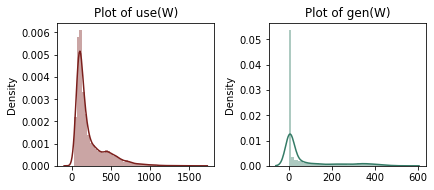

In [33]:
plt.figure(figsize = (12,12))
col = df1_train.columns 

from random import randint
colors = []

for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFF0))

for i,c in zip(range(len(col)-11), colors):
    plt.subplot(5, 4, i + 1)
    sns.distplot(x = df1_train[col[i]], color=c)
    plt.title('Plot of {}'.format(col[i]))
    plt.tight_layout()

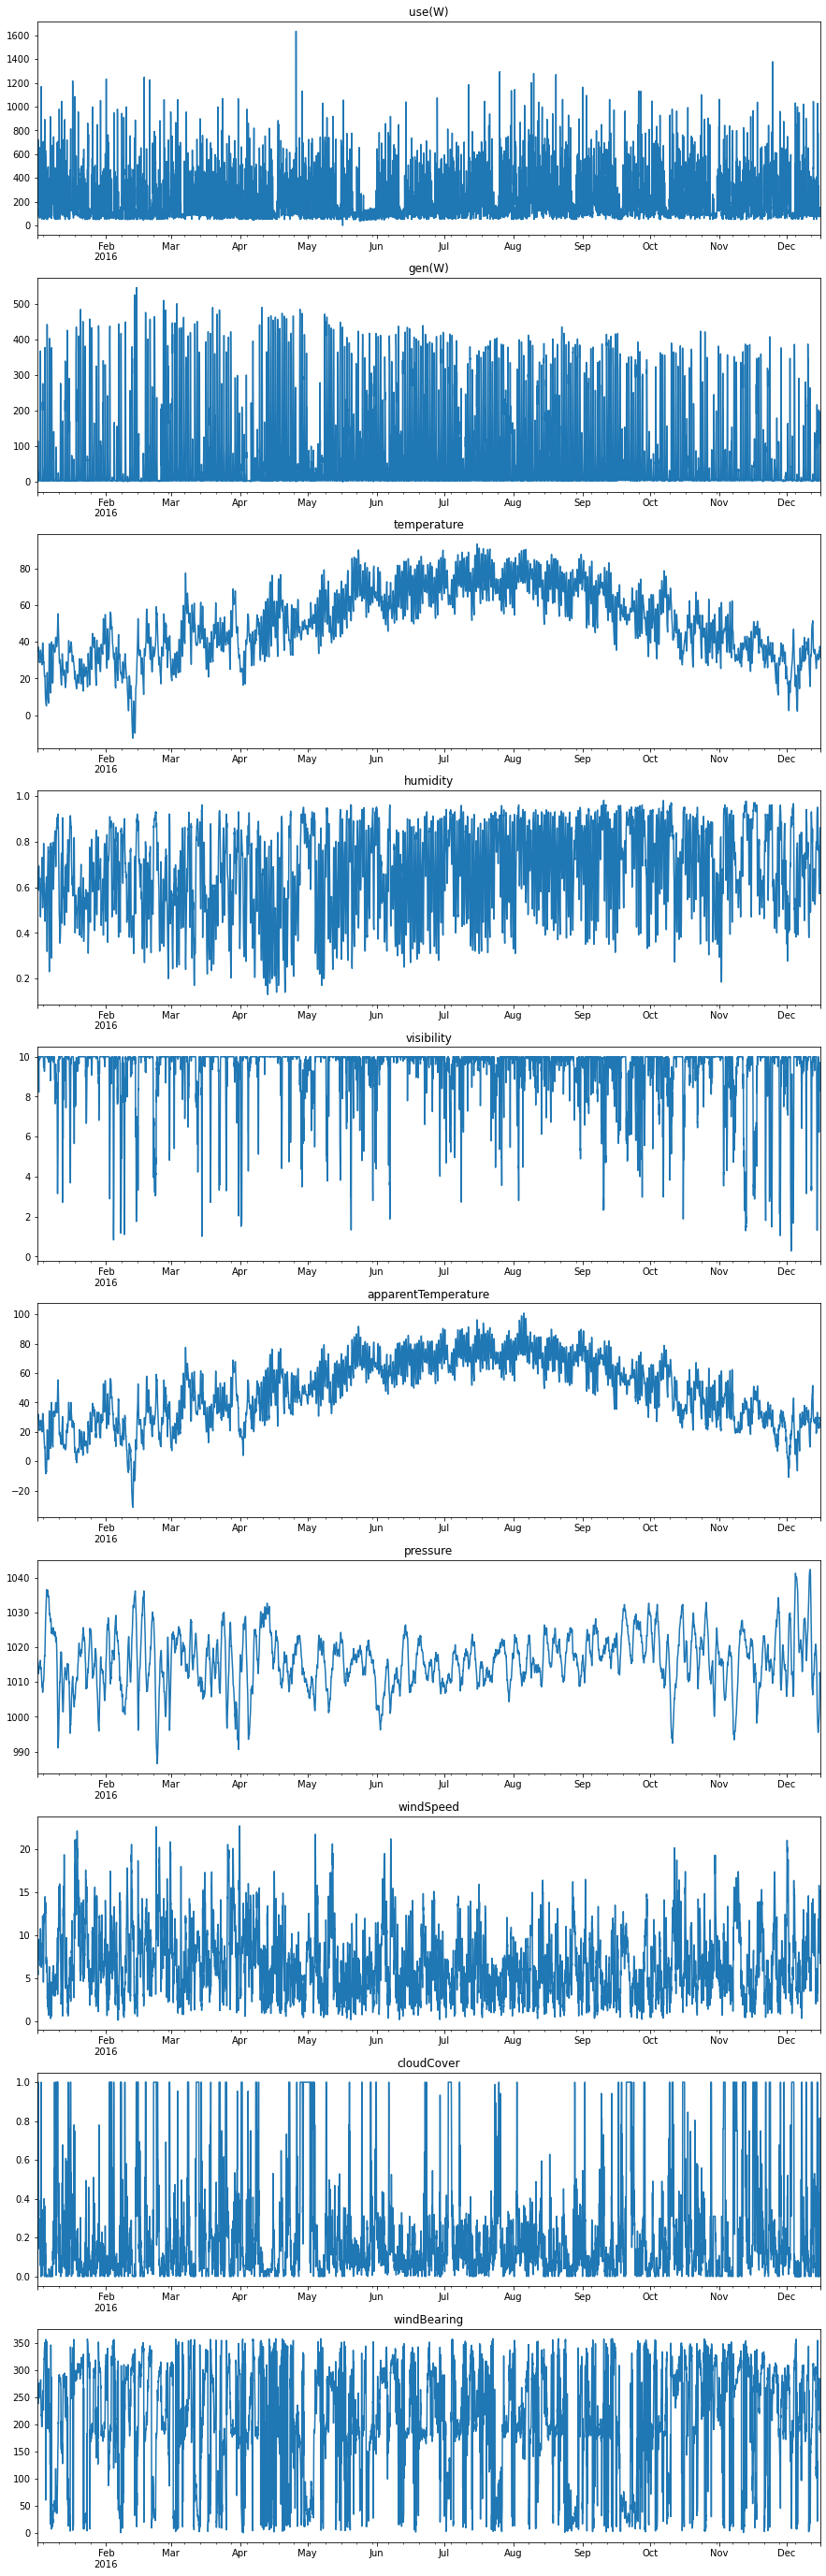

In [34]:
plt.figure(figsize = (15,100))
col = df1_train.columns
for i, c in zip(range(len(col)),colors):
    plt.subplot(20, 1, i + 1)
    df1_train[col[i]].plot()
    plt.title(format(col[i]))

### Bivariate Analysis

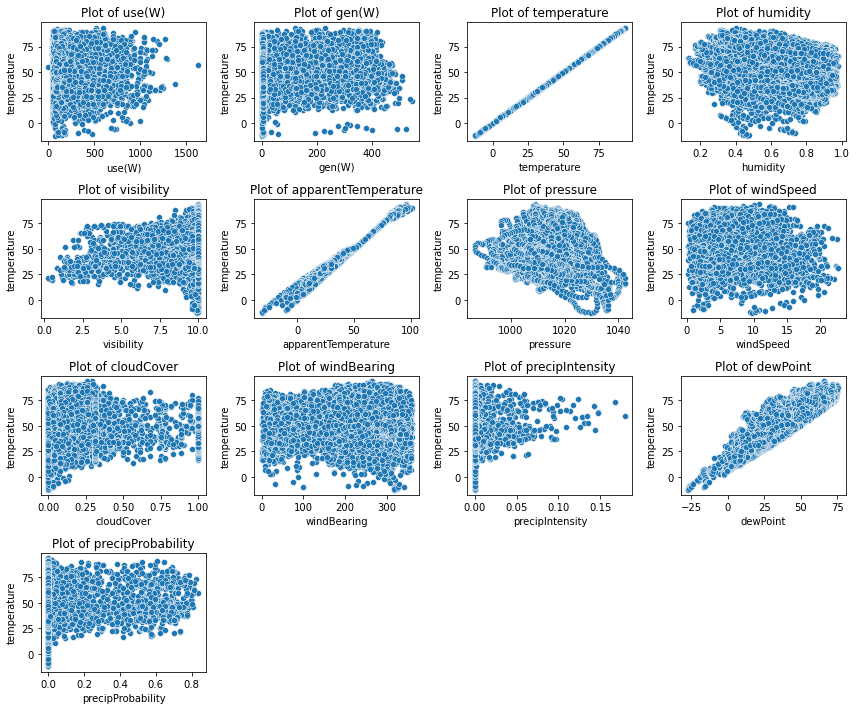

In [35]:
plt.figure(figsize = (12,12))
col = df1_train.columns
for i in range(len(col)):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(df1_train[col[i]],df1_train['temperature'])
    plt.title('Plot of {}'.format(col[i]))
    plt.tight_layout()

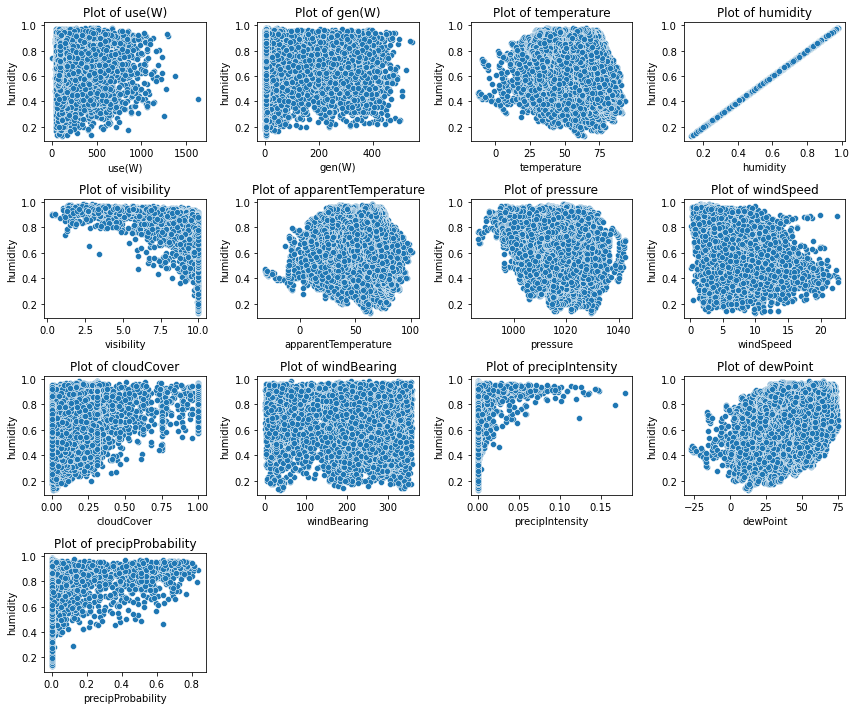

In [36]:
plt.figure(figsize = (12,12))
col = df1_train.columns
for i in range(len(col)):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(df1_train[col[i]],df1_train['humidity'])
    plt.title('Plot of {}'.format(col[i]))
    plt.tight_layout()

### Multivariate Analysis

<AxesSubplot:>

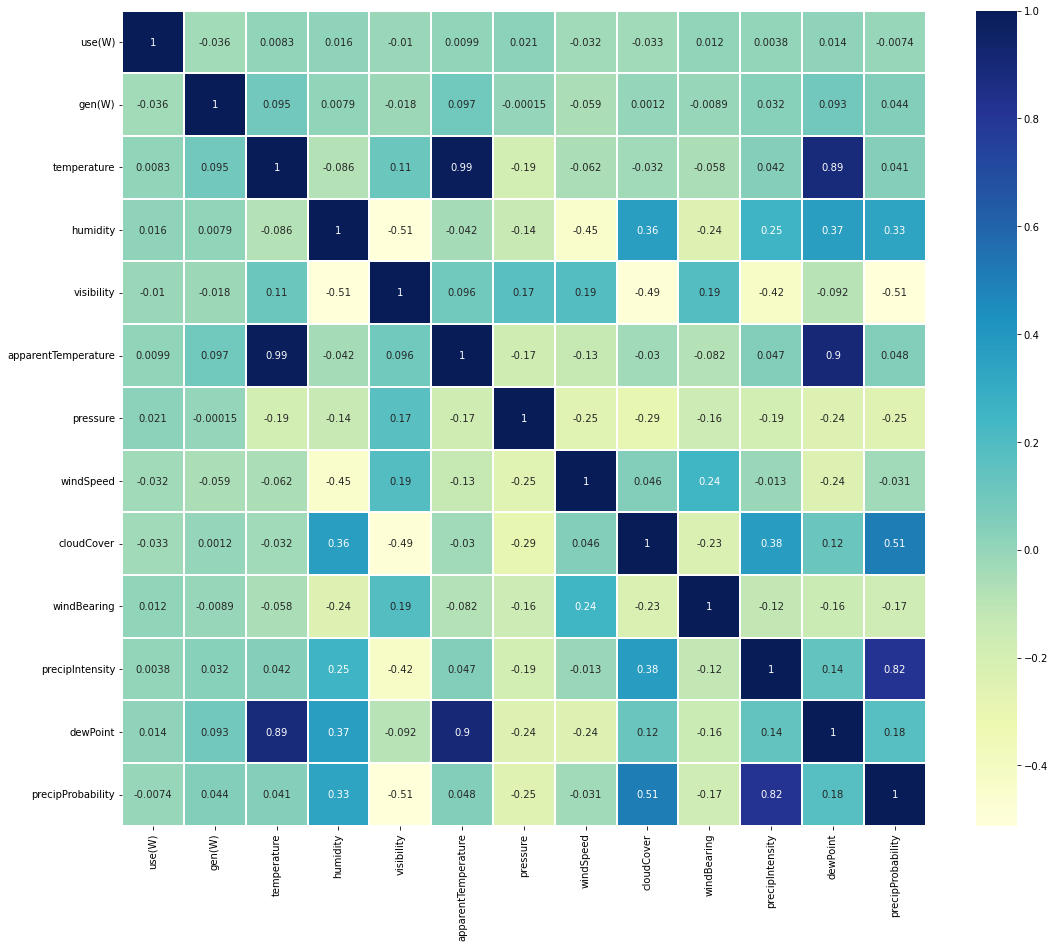

In [37]:
plt.figure(figsize = (18,15))
sns.heatmap(df1_train.corr(), annot=True, fmt='.2g', linewidths=0.1, linecolor='white', cbar=True, cmap='YlGnBu')

<Figure size 1440x1440 with 0 Axes>

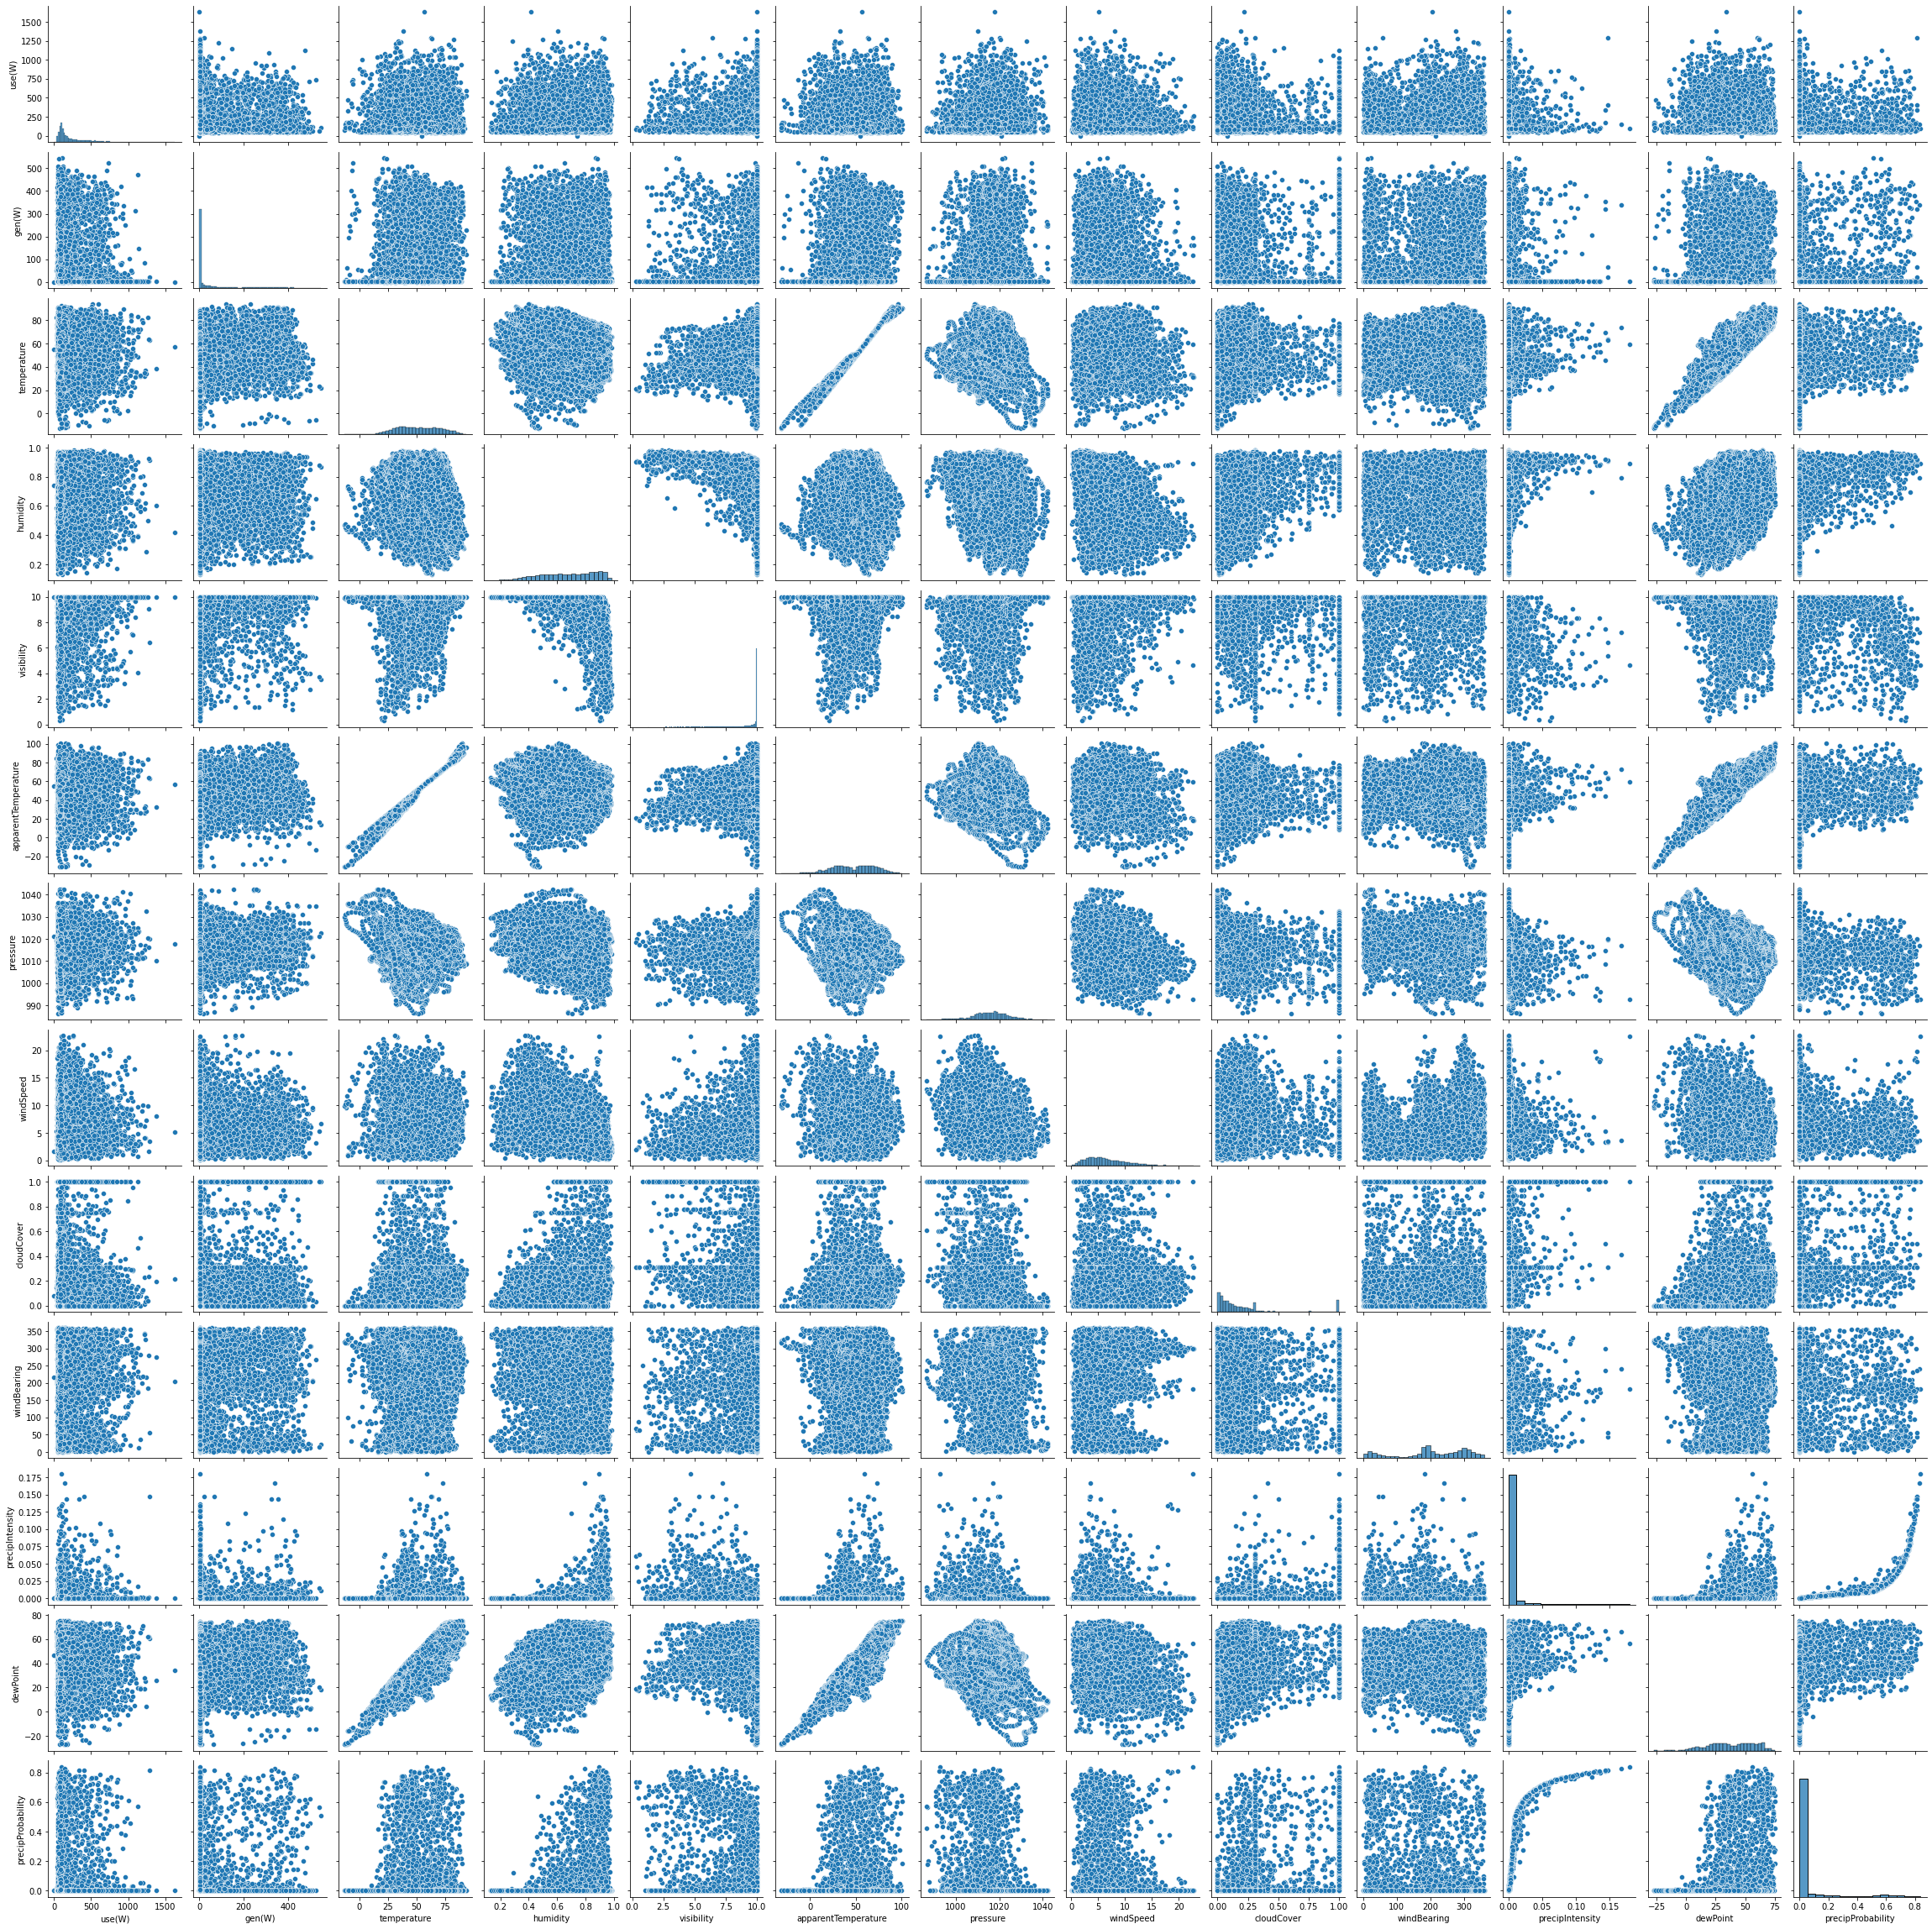

In [38]:
plt.figure(figsize = (20,20))
sns.pairplot(df1_train)

In [39]:
# Temperature is showing linearity with apparentTemperature.
# Solar(W) is linear with Gen(W).
# dewpoint is showing linearity with temperature.
# dewpoint is showing linearity with apparentTemperature.

### ENERGY DEMAND FORECASTING

In [98]:
from statsmodels.graphics.tsaplots import month_plot,plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose,STL 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.tools.eval_measures as em
import statsmodels.api as sm
from pylab import rcParams

In [41]:
use_df = df1_train['use(W)']

In [42]:
use_df.head()

2016-01-01 05:00:00    303.168810
2016-01-01 06:00:00    124.998436
2016-01-01 07:00:00    109.060475
2016-01-01 08:00:00    131.741303
2016-01-01 09:00:00     84.730847
Freq: H, Name: use(W), dtype: float64

In [43]:
use_df = use_df.to_frame()

In [44]:
use_df.index.weekday.unique()

Int64Index([4, 5, 6, 0, 1, 2, 3], dtype='int64')

<AxesSubplot:>

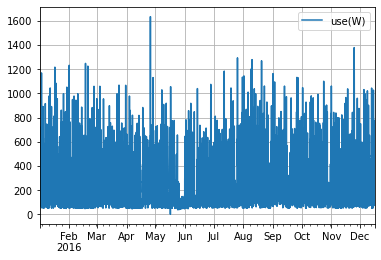

In [45]:
use_df.plot(grid=True)

In [46]:
use_df1 = use_df.resample('D').mean()

<AxesSubplot:>

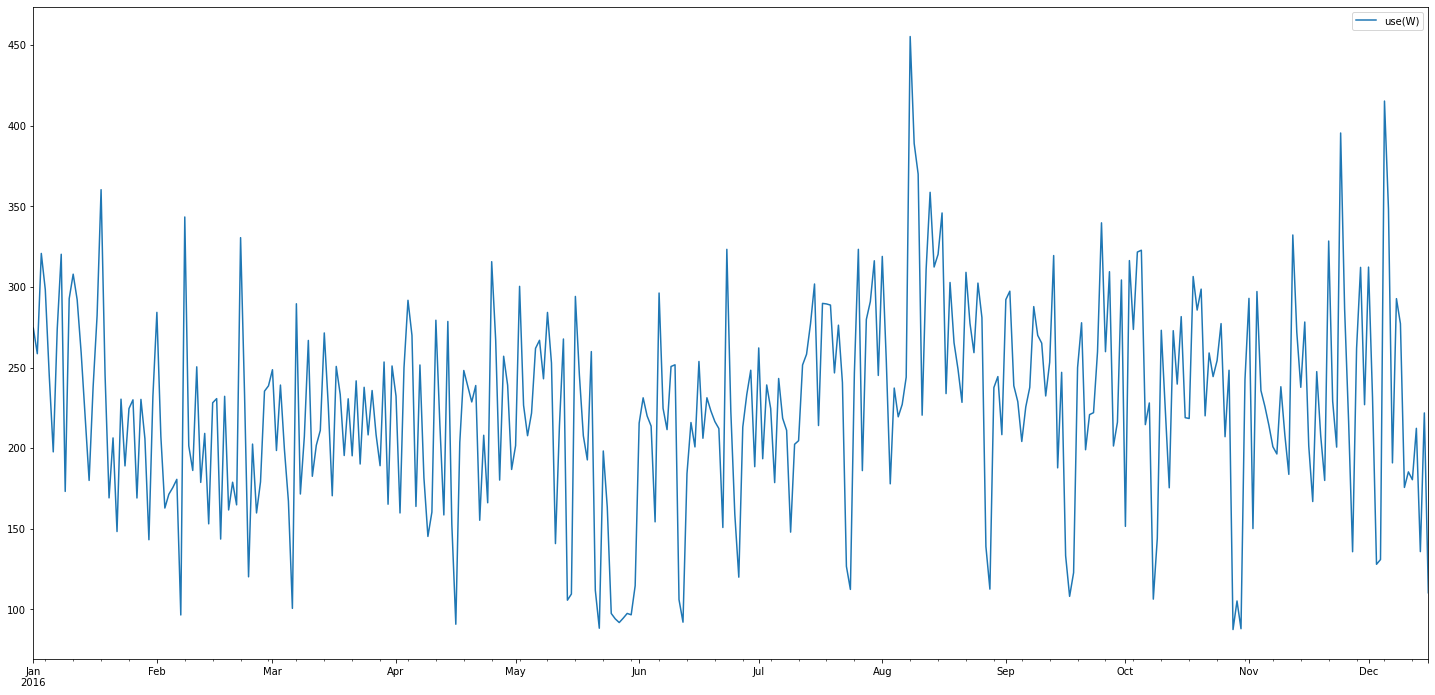

In [70]:
use_df1.plot(figsize=(25,12))

#### Plotting Monthly Data

In [48]:
use1 = pd.pivot_table(use_df, values = 'use(W)', columns = use_df.index.month, index = use_df.index.weekofyear)
use1.tail()

1   2   3   4   5   6   7   8   9   10          11          12
47         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  256.024871         NaN
48         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  266.967004  200.627373
49         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN         NaN  269.343116
50         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN         NaN  184.495114
53  285.352738 NaN NaN NaN NaN NaN NaN NaN NaN NaN         NaN         NaN

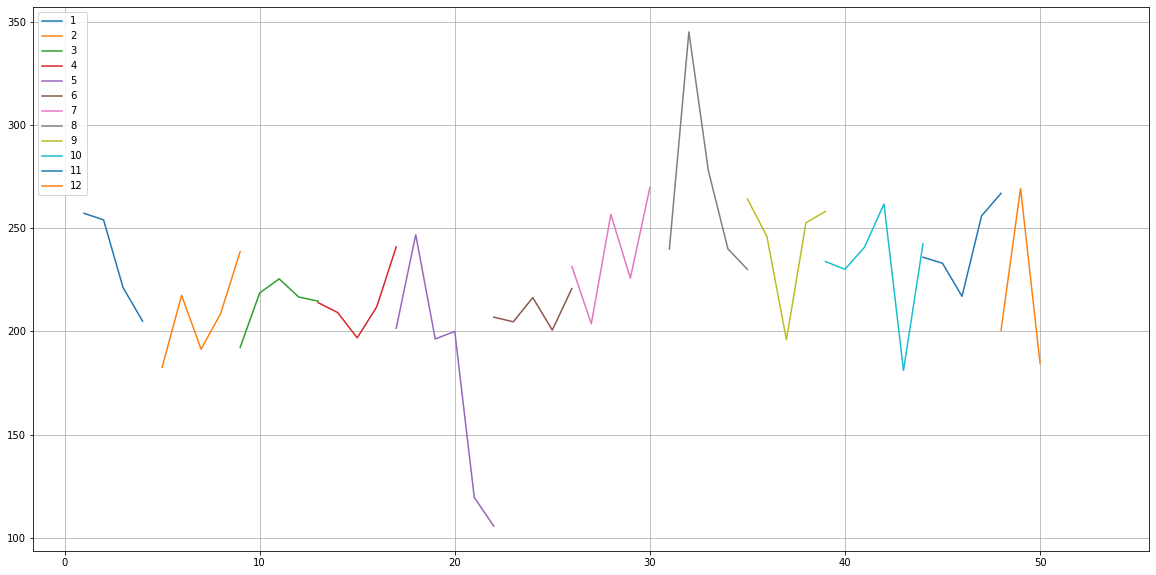

In [49]:
use1.plot(figsize=(20,10))
plt.grid() 

In [50]:
# Here above we can see that the energy consumption has peaked in the month of August. 
# For the month of May the energy consumption has been lowest.

In [51]:
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
use2 = pd.pivot_table(use_df, values = 'use(W)', columns = use_df.index.month, index = use_df.index.weekday)
use2.index = week
use2

1           2           3           4           5           6   \
Mon  297.787343  284.989139  236.341461  283.717550  234.697264  227.472158   
Tue  253.066027  218.071200  228.380344  247.555428  200.592453  221.479428   
Wed  198.787583  153.185390  186.324386  182.808939  163.384336  205.371224   
Thu  232.480246  214.118317  249.066480  256.499669  180.610834  249.488866   
Fri  223.636964  168.935947  205.810291  192.193026  220.323262  225.173150   
Sat  208.627313  186.923273  200.022139  158.103320  144.736167  177.477570   
Sun  263.368687  162.422423  187.608636  194.963277  147.958914  147.327018   

             7           8           9           10          11          12  
Mon  241.320704  328.221931  241.800101  252.394531  257.223984  297.857453  
Tue  260.569223  302.299507  283.056728  282.399018  261.750788  280.344047  
Wed  233.541785  249.849535  206.436878  247.724386  203.429637  163.328463  
Thu  262.976013  265.711149  252.774800  258.597969  266.942251  275.625102  
Fri  261.316946  269.175885  245.379034  193.809629  238.281201  243.227489  
Sat  199.643295  243.418137  217.895591  180.720191  245.559630  151.783294  
Sun  217.762648  224.326041  230.929187  202.326695  200.440180  158.073119

#### Plotting Weekly Data

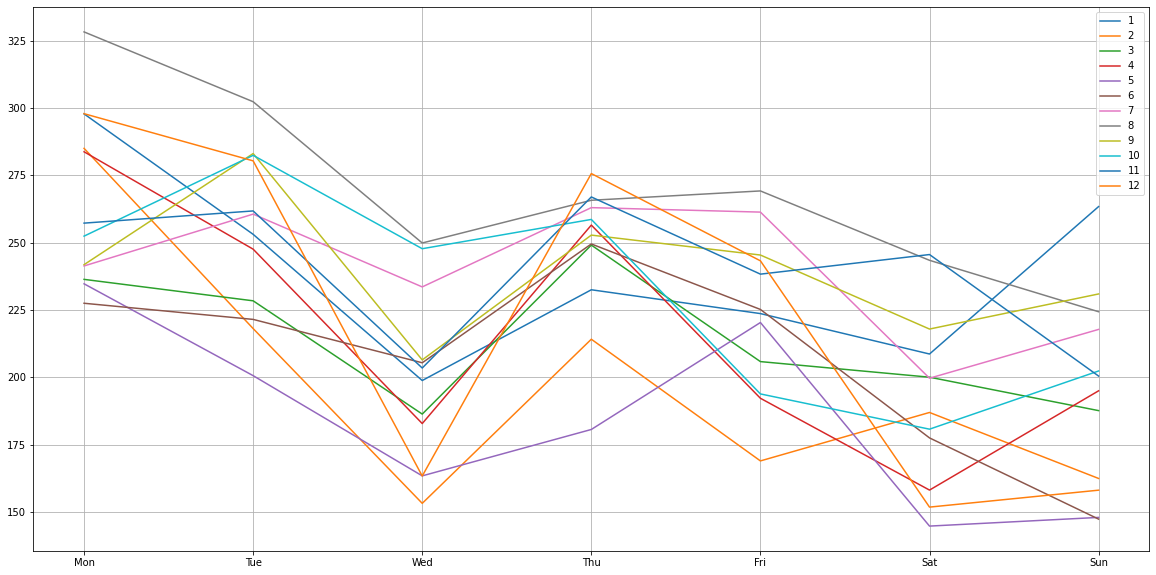

In [52]:
use2.plot(figsize=(20,10))
plt.grid() 

In [53]:
a = use_df1[use_df1['use(W)'].index.month==5]
a[a['use(W)'].index.weekday==2]

use(W)
2016-05-04  207.716696
2016-05-11  140.781379
2016-05-18  207.606254
2016-05-25   97.433017

#### Decomposing TS

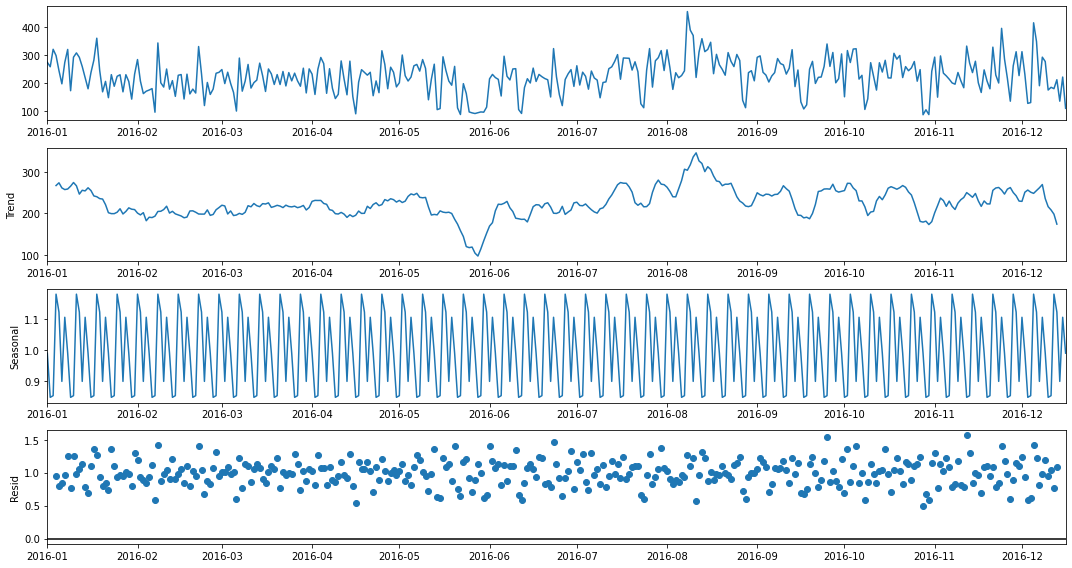

In [122]:
decompose = seasonal_decompose(use_df1, model='multiplicative')
rcParams['figure.figsize'] = 15,8
decompose.plot();

### Splitting into Train and Test

In [65]:
train = use_df1[use_df1.index.month<10]
test = use_df1[use_df1.index.month>=10]

<AxesSubplot:>

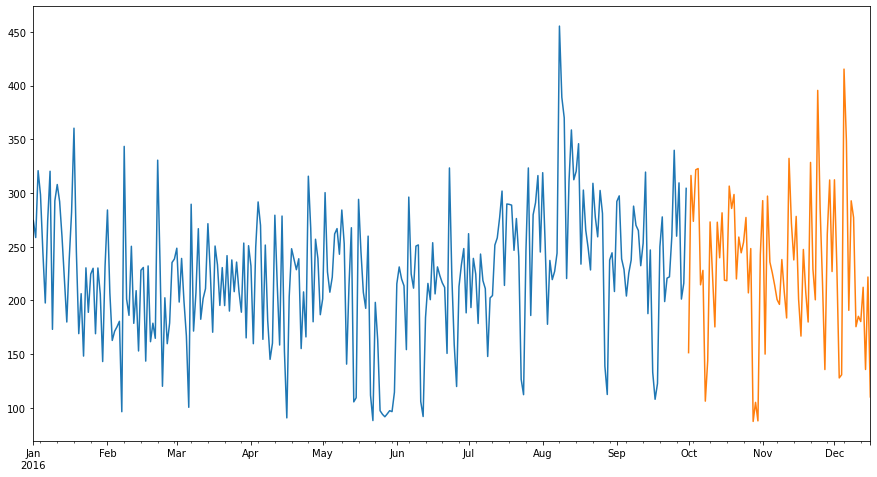

In [66]:
train['use(W)'].plot()
test['use(W)'].plot()

#### SIMPLE EXPONENTIAL SMOOTHING

In [73]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_fit = model_SES.fit(optimized=True)

In [75]:
model_SES_fit.params

{'smoothing_level': 0.14796234611163378,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 265.9100899730698,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_fit.forecast(steps=len(test))
SES_predict

2016-10-01    250.421821
2016-10-02    250.421821
2016-10-03    250.421821
2016-10-04    250.421821
2016-10-05    250.421821
                 ...    
2016-12-12    250.421821
2016-12-13    250.421821
2016-12-14    250.421821
2016-12-15    250.421821
2016-12-16    250.421821
Freq: D, Length: 77, dtype: float64

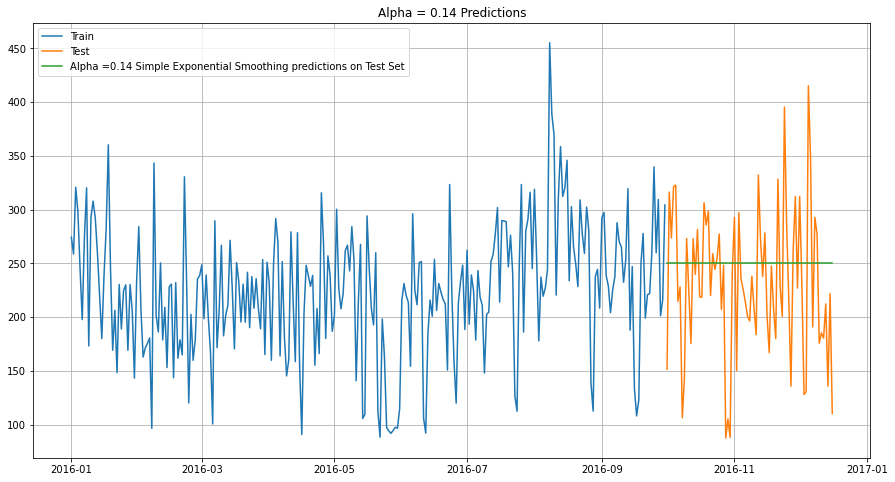

In [81]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.14 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.14 Predictions');

In [82]:
## Mean Absolute Percentage Error (MAPE) - Function Definition
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [88]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 70.4538715293219
SES RMSE (using statsmodels): 70.45387152932189


#### DOUBLE EXPONENTIAL SMOOTHING

In [99]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.14911953393808938, 'smoothing_trend': 0.0054771895642476195, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 262.68953489365674, 'initial_trend': -0.21460219415093224, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [100]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

2016-10-01    250.283330
2016-10-02    250.317165
2016-10-03    250.351001
2016-10-04    250.384836
2016-10-05    250.418672
                 ...    
2016-12-12    252.719483
2016-12-13    252.753318
2016-12-14    252.787154
2016-12-15    252.820989
2016-12-16    252.854825
Freq: D, Length: 77, dtype: float64

In [101]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))


DES RMSE: 70.82022943286796


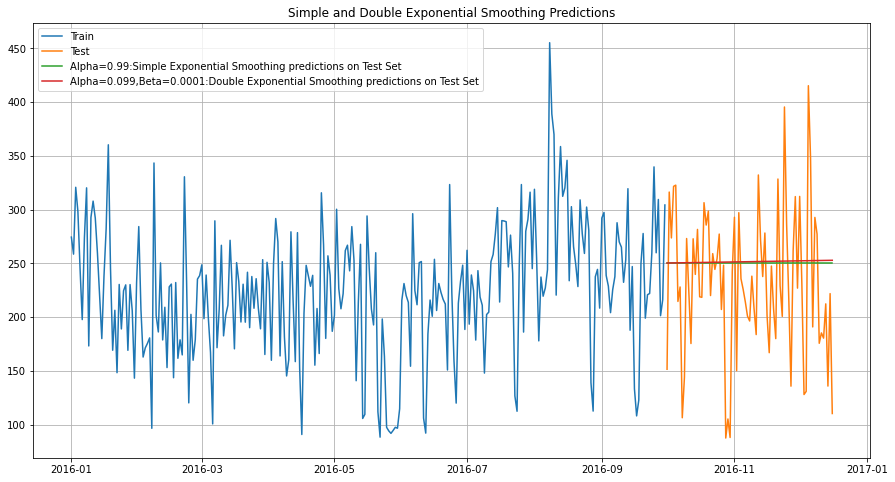

In [103]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

#### TRIPLE EXPONENTIAL SMOOTHING

In [112]:
# Initializing the Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('<< Holt Winters model Exponential Smoothing Estimated Parameters >>')
print('')
print(model_TES.params)


<< Holt Winters model Exponential Smoothing Estimated Parameters >>

{'smoothing_level': 0.23299362554205644, 'smoothing_trend': 0.005471342061186074, 'smoothing_seasonal': 0.07909100068342238, 'damping_trend': nan, 'initial_level': 276.18734914464227, 'initial_trend': -0.1987239359374242, 'initial_seasons': array([-13.37113515, -32.29337266, -13.22916729,  59.53734895,
        20.77887652, -30.4006479 ,  15.64272783]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [92]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

2016-10-01    224.001344
2016-10-02    225.103546
2016-10-03    282.790057
2016-10-04    286.540537
2016-10-05    232.208407
                 ...    
2016-12-12    284.850292
2016-12-13    288.600772
2016-12-14    234.268643
2016-12-15    270.504776
2016-12-16    258.830807
Freq: D, Length: 77, dtype: float64

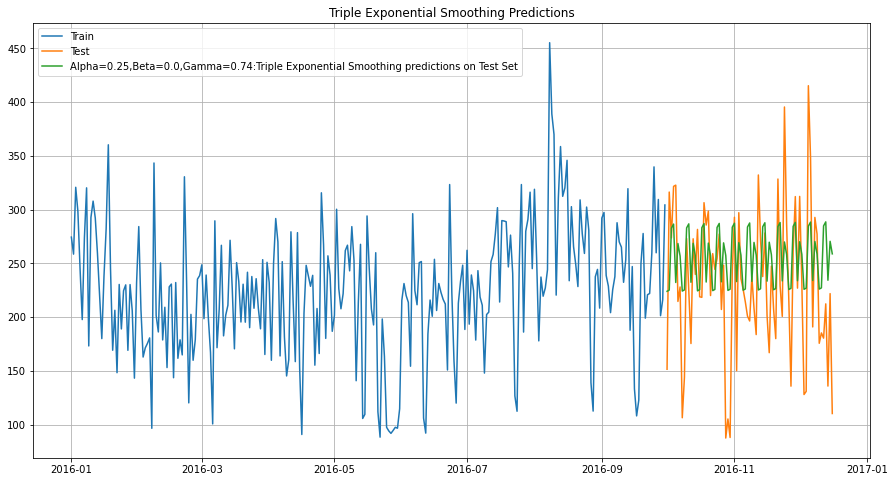

In [94]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [110]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))


TES_am RMSE: 65.51587988303119


#### MULTIPLICATIVE TRIPLE EXPONENTIAL SMOOTHING

In [105]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.16453009102142838, 'smoothing_trend': 0.0006129080323083869, 'smoothing_seasonal': 0.060284335906331726, 'damping_trend': nan, 'initial_level': 253.42691462184447, 'initial_trend': -0.2260348953954954, 'initial_seasons': array([1.02883927, 0.91708401, 1.03228281, 1.29710558, 1.14719398,
       0.89936131, 1.10896926]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [106]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

2016-10-01    216.475099
2016-10-02    218.317648
2016-10-03    285.116353
2016-10-04    280.372862
2016-10-05    227.774518
                 ...    
2016-12-12    267.882154
2016-12-13    263.410743
2016-12-14    213.982596
2016-12-15    251.194566
2016-12-16    235.994304
Freq: D, Length: 77, dtype: float64

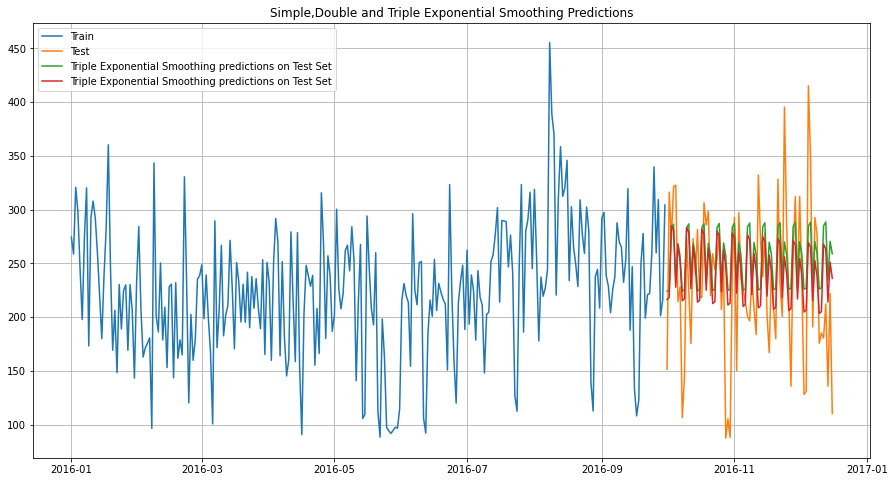

In [108]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [109]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 61.800850725952614


#### SARIMA MODEL
Since the data has some seasonality so we'll perform SARIMA

In [113]:
from statsmodels.tsa.stattools import adfuller

In [114]:
dftest = adfuller(use_df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.506
DF test p-value is 0.03874481385125578
Number of lags used 15


In [115]:
# So we see that at 5% significance level the time series is stationary

In [127]:
# Plotting ACF & PACF for the whole data

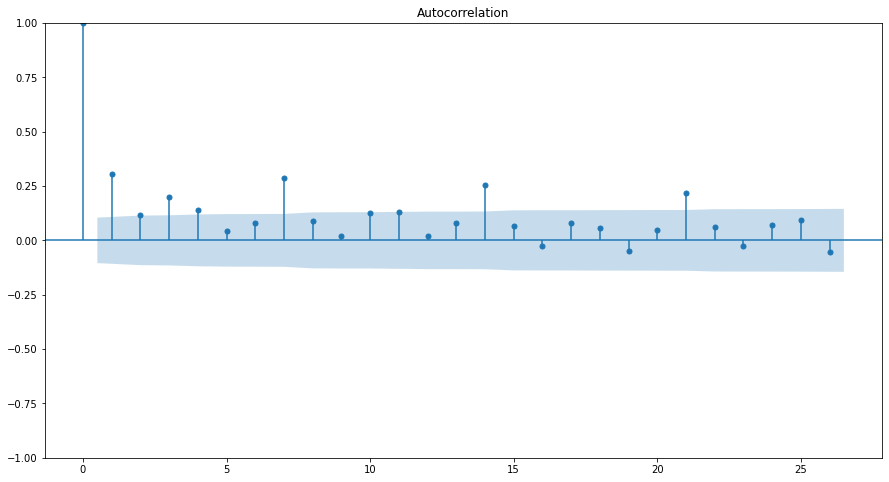

In [131]:
plot_acf(use_df1,alpha=0.05);

In [132]:
# From above there seems to be seasonality ion the data

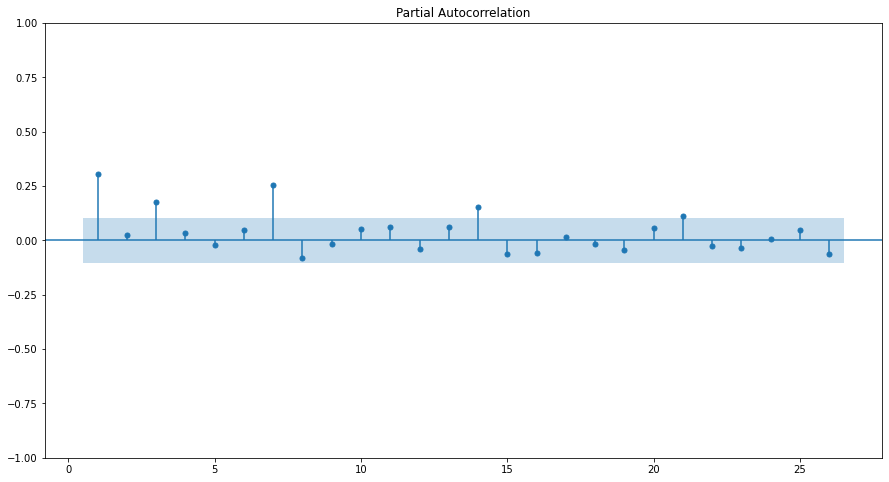

In [134]:
plot_pacf(use_df1,zero=False,alpha=0.05,method='ywmle');

#### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).
Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

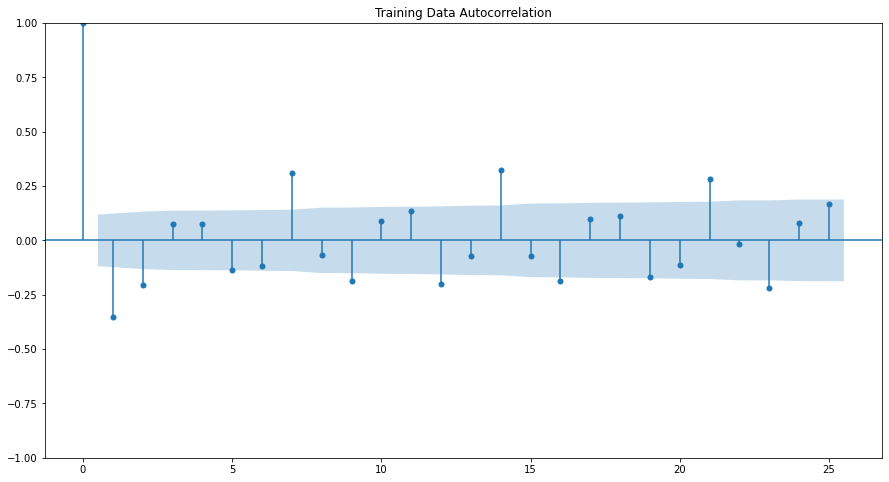

In [136]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [150]:
import itertools
p = q = range(0, 5)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 2)(0, 0, 2, 7)
Model: (0, 0, 3)(0, 0, 3, 7)
Model: (0, 0, 4)(0, 0, 4, 7)
Model: (1, 0, 0)(1, 0, 0, 7)
Model: (1, 0, 1)(1, 0, 1, 7)
Model: (1, 0, 2)(1, 0, 2, 7)
Model: (1, 0, 3)(1, 0, 3, 7)
Model: (1, 0, 4)(1, 0, 4, 7)
Model: (2, 0, 0)(2, 0, 0, 7)
Model: (2, 0, 1)(2, 0, 1, 7)
Model: (2, 0, 2)(2, 0, 2, 7)
Model: (2, 0, 3)(2, 0, 3, 7)
Model: (2, 0, 4)(2, 0, 4, 7)
Model: (3, 0, 0)(3, 0, 0, 7)
Model: (3, 0, 1)(3, 0, 1, 7)
Model: (3, 0, 2)(3, 0, 2, 7)
Model: (3, 0, 3)(3, 0, 3, 7)
Model: (3, 0, 4)(3, 0, 4, 7)
Model: (4, 0, 0)(4, 0, 0, 7)
Model: (4, 0, 1)(4, 0, 1, 7)
Model: (4, 0, 2)(4, 0, 2, 7)
Model: (4, 0, 3)(4, 0, 3, 7)
Model: (4, 0, 4)(4, 0, 4, 7)


In [151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['use(W)'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:3750.4390908017003
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:3440.59746946992
SARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:3217.8938242856
SARIMA(0, 0, 0)x(0, 0, 3, 7) - AIC:3044.096869708441
SARIMA(0, 0, 0)x(0, 0, 4, 7) - AIC:2918.9978394539803
SARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:3024.3253624545223
SARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:2911.8225464639036
SARIMA(0, 0, 0)x(1, 0, 2, 7) - AIC:2830.757182063181
SARIMA(0, 0, 0)x(1, 0, 3, 7) - AIC:2749.551374098954
SARIMA(0, 0, 0)x(1, 0, 4, 7) - AIC:2671.500779763107
SARIMA(0, 0, 0)x(2, 0, 0, 7) - AIC:2877.7728671224318
SARIMA(0, 0, 0)x(2, 0, 1, 7) - AIC:2845.3317018134608
SARIMA(0, 0, 0)x(2, 0, 2, 7) - AIC:2833.0484926265162
SARIMA(0, 0, 0)x(2, 0, 3, 7) - AIC:2751.509656074871
SARIMA(0, 0, 0)x(2, 0, 4, 7) - AIC:2671.700677392174
SARIMA(0, 0, 0)x(3, 0, 0, 7) - AIC:2792.510817206964


C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 0)x(3, 0, 1, 7) - AIC:2760.847582194765
SARIMA(0, 0, 0)x(3, 0, 2, 7) - AIC:2762.088729130892
SARIMA(0, 0, 0)x(3, 0, 3, 7) - AIC:2753.508629907762
SARIMA(0, 0, 0)x(3, 0, 4, 7) - AIC:2673.697886555413
SARIMA(0, 0, 0)x(4, 0, 0, 7) - AIC:2705.884677917451
SARIMA(0, 0, 0)x(4, 0, 1, 7) - AIC:2686.585286620633
SARIMA(0, 0, 0)x(4, 0, 2, 7) - AIC:2684.1498865543526
SARIMA(0, 0, 0)x(4, 0, 3, 7) - AIC:2683.877512434113
SARIMA(0, 0, 0)x(4, 0, 4, 7) - AIC:2675.510717147359
SARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:3478.500401399989
SARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:3258.1785428671215
SARIMA(0, 0, 1)x(0, 0, 2, 7) - AIC:3089.485477838659
SARIMA(0, 0, 1)x(0, 0, 3, 7) - AIC:2947.990449657548
SARIMA(0, 0, 1)x(0, 0, 4, 7) - AIC:2834.4925906953404
SARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:2998.339541566485
SARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:2869.337111949562
SARIMA(0, 0, 1)x(1, 0, 2, 7) - AIC:2788.5095946054007
SARIMA(0, 0, 1)x(1, 0, 3, 7) - AIC:2711.3591897510037
SARIMA(0, 0, 1)x(1, 0, 4, 7) - AIC:2636.0

SARIMA(1, 0, 1)x(4, 0, 0, 7) - AIC:2653.8374467908707
SARIMA(1, 0, 1)x(4, 0, 1, 7) - AIC:2633.6355440545053
SARIMA(1, 0, 1)x(4, 0, 2, 7) - AIC:2632.656480910556
SARIMA(1, 0, 1)x(4, 0, 3, 7) - AIC:2629.7017562060837
SARIMA(1, 0, 1)x(4, 0, 4, 7) - AIC:2619.557368124364
SARIMA(1, 0, 2)x(0, 0, 0, 7) - AIC:2961.323615029277
SARIMA(1, 0, 2)x(0, 0, 1, 7) - AIC:2873.651867225303
SARIMA(1, 0, 2)x(0, 0, 2, 7) - AIC:2789.5384062772273
SARIMA(1, 0, 2)x(0, 0, 3, 7) - AIC:2710.868704588424
SARIMA(1, 0, 2)x(0, 0, 4, 7) - AIC:2638.490147761474
SARIMA(1, 0, 2)x(1, 0, 0, 7) - AIC:2892.8381221667973
SARIMA(1, 0, 2)x(1, 0, 1, 7) - AIC:2835.539694471527
SARIMA(1, 0, 2)x(1, 0, 2, 7) - AIC:2757.950574491295
SARIMA(1, 0, 2)x(1, 0, 3, 7) - AIC:2683.7076867639335
SARIMA(1, 0, 2)x(1, 0, 4, 7) - AIC:2612.8159662459248


C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 0, 0, 7) - AIC:2801.9158669131757
SARIMA(1, 0, 2)x(2, 0, 1, 7) - AIC:2783.171156290214
SARIMA(1, 0, 2)x(2, 0, 2, 7) - AIC:2758.0831617283743
SARIMA(1, 0, 2)x(2, 0, 3, 7) - AIC:2682.2182656018754
SARIMA(1, 0, 2)x(2, 0, 4, 7) - AIC:2610.913820959744
SARIMA(1, 0, 2)x(3, 0, 0, 7) - AIC:2725.9243037173837
SARIMA(1, 0, 2)x(3, 0, 1, 7) - AIC:2708.170905589645
SARIMA(1, 0, 2)x(3, 0, 2, 7) - AIC:2707.9460395564806
SARIMA(1, 0, 2)x(3, 0, 3, 7) - AIC:2680.0558888397495
SARIMA(1, 0, 2)x(3, 0, 4, 7) - AIC:2610.1956532120907
SARIMA(1, 0, 2)x(4, 0, 0, 7) - AIC:2649.733227293442
SARIMA(1, 0, 2)x(4, 0, 1, 7) - AIC:2636.4312064986534
SARIMA(1, 0, 2)x(4, 0, 2, 7) - AIC:2634.143676264886
SARIMA(1, 0, 2)x(4, 0, 3, 7) - AIC:2631.3930763338617
SARIMA(1, 0, 2)x(4, 0, 4, 7) - AIC:2611.5557553705266
SARIMA(1, 0, 3)x(0, 0, 0, 7) - AIC:2951.5794004595523
SARIMA(1, 0, 3)x(0, 0, 1, 7) - AIC:2865.2440925010496
SARIMA(1, 0, 3)x(0, 0, 2, 7) - AIC:2780.299784197971
SARIMA(1, 0, 3)x(0, 0, 3, 7) - AIC

C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 4)x(1, 0, 0, 7) - AIC:2898.360241757166
SARIMA(1, 0, 4)x(1, 0, 1, 7) - AIC:2816.504168603453
SARIMA(1, 0, 4)x(1, 0, 2, 7) - AIC:2740.809942904285
SARIMA(1, 0, 4)x(1, 0, 3, 7) - AIC:2666.4363488170898
SARIMA(1, 0, 4)x(1, 0, 4, 7) - AIC:2593.3646281549395
SARIMA(1, 0, 4)x(2, 0, 0, 7) - AIC:2799.514148186525
SARIMA(1, 0, 4)x(2, 0, 1, 7) - AIC:2785.755508753253
SARIMA(1, 0, 4)x(2, 0, 2, 7) - AIC:2738.9863309731827
SARIMA(1, 0, 4)x(2, 0, 3, 7) - AIC:2665.9666697496273
SARIMA(1, 0, 4)x(2, 0, 4, 7) - AIC:2591.3310112691743
SARIMA(1, 0, 4)x(3, 0, 0, 7) - AIC:2722.1959065398805
SARIMA(1, 0, 4)x(3, 0, 1, 7) - AIC:2710.8414668476644
SARIMA(1, 0, 4)x(3, 0, 2, 7) - AIC:2710.8757102993854
SARIMA(1, 0, 4)x(3, 0, 3, 7) - AIC:2662.116746512843
SARIMA(1, 0, 4)x(3, 0, 4, 7) - AIC:2593.459581846289
SARIMA(1, 0, 4)x(4, 0, 0, 7) - AIC:2647.898091522342
SARIMA(1, 0, 4)x(4, 0, 1, 7) - AIC:2637.5573034758927
SARIMA(1, 0, 4)x(4, 0, 2, 7) - AIC:2636.432386841174
SARIMA(1, 0, 4)x(4, 0, 3, 7) - AIC:26

C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(0, 0, 2, 7) - AIC:2791.78205303143
SARIMA(2, 0, 2)x(0, 0, 3, 7) - AIC:2713.988703633495
SARIMA(2, 0, 2)x(0, 0, 4, 7) - AIC:2642.1263597394945
SARIMA(2, 0, 2)x(1, 0, 0, 7) - AIC:2883.6262180932085
SARIMA(2, 0, 2)x(1, 0, 1, 7) - AIC:2836.82498662427
SARIMA(2, 0, 2)x(1, 0, 2, 7) - AIC:2759.6412392250268
SARIMA(2, 0, 2)x(1, 0, 3, 7) - AIC:2685.704220115443
SARIMA(2, 0, 2)x(1, 0, 4, 7) - AIC:2613.769584245688


C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 0, 2)x(2, 0, 0, 7) - AIC:2793.862111080684
SARIMA(2, 0, 2)x(2, 0, 1, 7) - AIC:2770.131734822803
SARIMA(2, 0, 2)x(2, 0, 2, 7) - AIC:2759.3987332521965
SARIMA(2, 0, 2)x(2, 0, 3, 7) - AIC:2684.204690255716
SARIMA(2, 0, 2)x(2, 0, 4, 7) - AIC:2611.338514686131
SARIMA(2, 0, 2)x(3, 0, 0, 7) - AIC:2715.651337511967
SARIMA(2, 0, 2)x(3, 0, 1, 7) - AIC:2697.3554403756657
SARIMA(2, 0, 2)x(3, 0, 2, 7) - AIC:2698.878682254736
SARIMA(2, 0, 2)x(3, 0, 3, 7) - AIC:2682.01474734491
SARIMA(2, 0, 2)x(3, 0, 4, 7) - AIC:2612.1377190892244
SARIMA(2, 0, 2)x(4, 0, 0, 7) - AIC:2641.479469866661
SARIMA(2, 0, 2)x(4, 0, 1, 7) - AIC:2624.7350263184603
SARIMA(2, 0, 2)x(4, 0, 2, 7) - AIC:2621.5115679371183
SARIMA(2, 0, 2)x(4, 0, 3, 7) - AIC:2621.8803669844374
SARIMA(2, 0, 2)x(4, 0, 4, 7) - AIC:2613.3395181122396
SARIMA(2, 0, 3)x(0, 0, 0, 7) - AIC:2953.4649686728408
SARIMA(2, 0, 3)x(0, 0, 1, 7) - AIC:2867.6926166096528
SARIMA(2, 0, 3)x(0, 0, 2, 7) - AIC:2781.971182134611
SARIMA(2, 0, 3)x(0, 0, 3, 7) - AIC:270

C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 2)x(2, 0, 0, 7) - AIC:2780.3226184972946
SARIMA(3, 0, 2)x(2, 0, 1, 7) - AIC:2759.7593709381276
SARIMA(3, 0, 2)x(2, 0, 2, 7) - AIC:2759.8725143704955
SARIMA(3, 0, 2)x(2, 0, 3, 7) - AIC:2686.203850392536
SARIMA(3, 0, 2)x(2, 0, 4, 7) - AIC:2612.876895870513
SARIMA(3, 0, 2)x(3, 0, 0, 7) - AIC:2705.154001668266
SARIMA(3, 0, 2)x(3, 0, 1, 7) - AIC:2688.5434856983593
SARIMA(3, 0, 2)x(3, 0, 2, 7) - AIC:2687.2227316079143
SARIMA(3, 0, 2)x(3, 0, 3, 7) - AIC:2684.0146713617687
SARIMA(3, 0, 2)x(3, 0, 4, 7) - AIC:2613.5823121905687
SARIMA(3, 0, 2)x(4, 0, 0, 7) - AIC:2627.506268107855
SARIMA(3, 0, 2)x(4, 0, 1, 7) - AIC:2614.8054284626633
SARIMA(3, 0, 2)x(4, 0, 2, 7) - AIC:2613.2001843116386
SARIMA(3, 0, 2)x(4, 0, 3, 7) - AIC:2613.5526387795635
SARIMA(3, 0, 2)x(4, 0, 4, 7) - AIC:2614.063226957322
SARIMA(3, 0, 3)x(0, 0, 0, 7) - AIC:2917.031255363441


C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(0, 0, 1, 7) - AIC:2867.442927406015
SARIMA(3, 0, 3)x(0, 0, 2, 7) - AIC:2781.8666975546757
SARIMA(3, 0, 3)x(0, 0, 3, 7) - AIC:2704.1656541176567
SARIMA(3, 0, 3)x(0, 0, 4, 7) - AIC:2630.9034949938105
SARIMA(3, 0, 3)x(1, 0, 0, 7) - AIC:2871.5167811227293
SARIMA(3, 0, 3)x(1, 0, 1, 7) - AIC:2827.3757510265923
SARIMA(3, 0, 3)x(1, 0, 2, 7) - AIC:2747.114195159762
SARIMA(3, 0, 3)x(1, 0, 3, 7) - AIC:2678.4736050160777
SARIMA(3, 0, 3)x(1, 0, 4, 7) - AIC:2606.942060199829
SARIMA(3, 0, 3)x(2, 0, 0, 7) - AIC:2782.803395956227
SARIMA(3, 0, 3)x(2, 0, 1, 7) - AIC:2761.595593024441
SARIMA(3, 0, 3)x(2, 0, 2, 7) - AIC:2751.667796025472
SARIMA(3, 0, 3)x(2, 0, 3, 7) - AIC:2677.7543130503345
SARIMA(3, 0, 3)x(2, 0, 4, 7) - AIC:2603.057972870768
SARIMA(3, 0, 3)x(3, 0, 0, 7) - AIC:2704.677733400401
SARIMA(3, 0, 3)x(3, 0, 1, 7) - AIC:2689.1479784440216
SARIMA(3, 0, 3)x(3, 0, 2, 7) - AIC:2684.9766995182345
SARIMA(3, 0, 3)x(3, 0, 3, 7) - AIC:2674.4132157962217
SARIMA(3, 0, 3)x(3, 0, 4, 7) - AIC:2

C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 0, 1)x(0, 0, 3, 7) - AIC:2725.61851793414
SARIMA(4, 0, 1)x(0, 0, 4, 7) - AIC:2653.1361434010173
SARIMA(4, 0, 1)x(1, 0, 0, 7) - AIC:2861.0105901405495
SARIMA(4, 0, 1)x(1, 0, 1, 7) - AIC:2827.156043650789
SARIMA(4, 0, 1)x(1, 0, 2, 7) - AIC:2773.88621236997
SARIMA(4, 0, 1)x(1, 0, 3, 7) - AIC:2698.0393975609304
SARIMA(4, 0, 1)x(1, 0, 4, 7) - AIC:2626.423333588571
SARIMA(4, 0, 1)x(2, 0, 0, 7) - AIC:2766.92873239679
SARIMA(4, 0, 1)x(2, 0, 1, 7) - AIC:2750.20059508319
SARIMA(4, 0, 1)x(2, 0, 2, 7) - AIC:2750.5518658998512
SARIMA(4, 0, 1)x(2, 0, 3, 7) - AIC:2702.4726237358846
SARIMA(4, 0, 1)x(2, 0, 4, 7) - AIC:2622.972241919324
SARIMA(4, 0, 1)x(3, 0, 0, 7) - AIC:2708.2961001745207
SARIMA(4, 0, 1)x(3, 0, 1, 7) - AIC:2678.120395434031
SARIMA(4, 0, 1)x(3, 0, 2, 7) - AIC:2676.8165827746484
SARIMA(4, 0, 1)x(3, 0, 3, 7) - AIC:2673.8573642634274
SARIMA(4, 0, 1)x(3, 0, 4, 7) - AIC:2623.52889567216
SARIMA(4, 0, 1)x(4, 0, 0, 7) - AIC:2618.0012765682495
SARIMA(4, 0, 1)x(4, 0, 1, 7) - AIC:2604.78

C:\Users\hosha\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 0, 3)x(3, 0, 0, 7) - AIC:2694.6947976414463
SARIMA(4, 0, 3)x(3, 0, 1, 7) - AIC:2680.7567560045363
SARIMA(4, 0, 3)x(3, 0, 2, 7) - AIC:2675.8281498090464
SARIMA(4, 0, 3)x(3, 0, 3, 7) - AIC:2672.636331355955
SARIMA(4, 0, 3)x(3, 0, 4, 7) - AIC:2606.735897925485
SARIMA(4, 0, 3)x(4, 0, 0, 7) - AIC:2621.4737780654496
SARIMA(4, 0, 3)x(4, 0, 1, 7) - AIC:2595.834582721065
SARIMA(4, 0, 3)x(4, 0, 2, 7) - AIC:2605.0914435933582
SARIMA(4, 0, 3)x(4, 0, 3, 7) - AIC:2606.7374481977586
SARIMA(4, 0, 3)x(4, 0, 4, 7) - AIC:2606.2706806144606
SARIMA(4, 0, 4)x(0, 0, 0, 7) - AIC:2897.1540010235476
SARIMA(4, 0, 4)x(0, 0, 1, 7) - AIC:2826.3898719987933
SARIMA(4, 0, 4)x(0, 0, 2, 7) - AIC:2746.810166301868
SARIMA(4, 0, 4)x(0, 0, 3, 7) - AIC:2673.2035893563707
SARIMA(4, 0, 4)x(0, 0, 4, 7) - AIC:2603.9771784464124
SARIMA(4, 0, 4)x(1, 0, 0, 7) - AIC:2835.9557816911665
SARIMA(4, 0, 4)x(1, 0, 1, 7) - AIC:2814.0521918057084
SARIMA(4, 0, 4)x(1, 0, 2, 7) - AIC:2738.4879252325068
SARIMA(4, 0, 4)x(1, 0, 3, 7) - A

In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
614  (4, 0, 4)  (2, 0, 4, 7)  2590.179164
499  (3, 0, 4)  (4, 0, 4, 7)   2591.04566
239  (1, 0, 4)  (2, 0, 4, 7)  2591.331011
364  (2, 0, 4)  (2, 0, 4, 7)   2591.99045
249  (1, 0, 4)  (4, 0, 4, 7)  2592.614601

In [155]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['use(W)'],
                                order=(4, 0, 4),
                                seasonal_order=(2, 0, 4, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            use(W)   No. Observations:                  274
Model:             SARIMAX(4, 0, 4)x(2, 0, 4, 7)   Log Likelihood               -1280.090
Date:                           Fri, 28 Oct 2022   AIC                           2590.179
Time:                                   10:28:00   BIC                           2642.451
Sample:                               01-01-2016   HQIC                          2611.239
                                    - 09-30-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0693      0.828      0.084      0.933      -1.553       1.691
ar.L2          0.3091      0.404      0.765

#### Predict on the Test Set using this model and evaluate the model.

In [156]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [157]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

use(W)            mean    mean_se  mean_ci_lower  mean_ci_upper
2016-10-01  230.678534  47.372830     137.829492     323.527575
2016-10-02  225.025859  50.648571     125.756484     324.295234
2016-10-03  280.240283  51.899870     178.518407     381.962160
2016-10-04  282.780613  52.396523     180.085315     385.475910
2016-10-05  224.446859  52.902475     120.759914     328.133804

In [160]:
rmse = mean_squared_error(test['use(W)'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = MAPE(test['use(W)'], predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 63.82265601527459 
MAPE: 28.35348885171217


#### Building the most optimum model on the Full Data.

In [162]:
full_data_model = sm.tsa.statespace.SARIMAX(use_df1['use(W)'],
                                order=(4, 0, 4),
                                seasonal_order=(2, 0, 4, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            use(W)   No. Observations:                  351
Model:             SARIMAX(4, 0, 4)x(2, 0, 4, 7)   Log Likelihood               -1714.724
Date:                           Fri, 28 Oct 2022   AIC                           3459.448
Time:                                   10:44:47   BIC                           3515.879
Sample:                               01-01-2016   HQIC                          3481.987
                                    - 12-16-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3518      1.228      0.286      0.775      -2.055       2.759
ar.L2          0.6015      1.035      0.581

In [172]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=30)

In [173]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

use(W)            mean    mean_se  mean_ci_lower  mean_ci_upper
2016-12-17  141.998077  51.748624      40.572638     243.423516
2016-12-18  172.075973  54.353839      65.544407     278.607539
2016-12-19  243.677701  55.110903     135.662316     351.693086
2016-12-20  258.082468  55.965083     148.392921     367.772015
2016-12-21  186.864485  56.050539      77.007448     296.721522

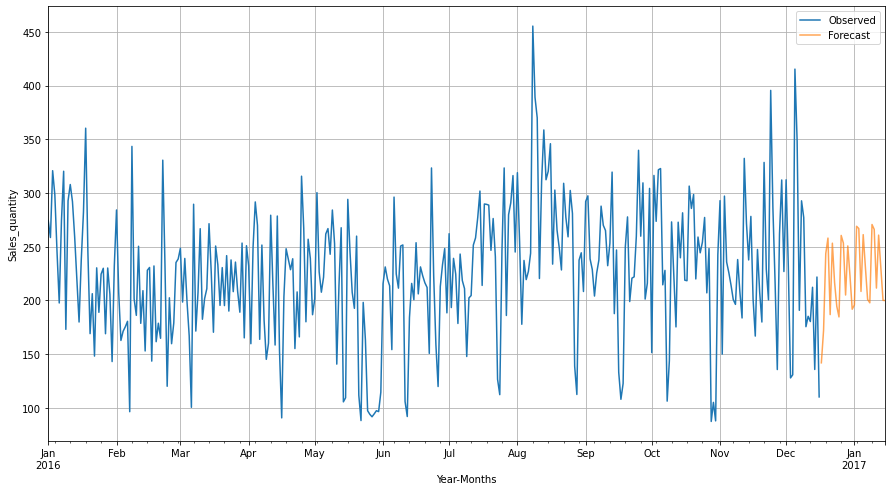

In [174]:
axis = use_df1['use(W)'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();